<a href="https://colab.research.google.com/github/mastaler/Grupo-de-Estudos-FIAP/blob/main/WanderleiGrizolli_RM568198_fase3_cap10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Produtos Agrícolas
Este notebook realiza a análise exploratória e preditiva de uma base de dados contendo condições de solo e clima associadas a diferentes culturas agrícolas.

**Nome:** Wanderlei Grizolli  
**RM:** RM568198
**Fase:** 3  
**Capítulo:** 10

In [2]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Ler o dataset
df = pd.read_csv('Atividade_Cap10_produtos_agricolas.csv')
# Mostrar dimensões e primeiras linhas
display(df.shape)
display(df.head())

(2200, 8)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Análise Exploratória

Aqui exploramos a estrutura do conjunto de dados: suas dimensões, tipos das variáveis e um resumo estatístico básico. Isso nos ajuda a entender a saúde do nosso dataset, verificar tipos de dados e se existem valores ausentes.

A seguir, veremos gráficos detalhando a distribuição das variáveis e a separação das classes.

In [3]:
# Informações gerais e estatísticas básicas
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Distribuição das Culturas

Este gráfico de barras demonstra quantas instâncias existem de cada cultura no dataset. A distribuição balanceada ajuda a evitar viés em algoritmos de classificação.

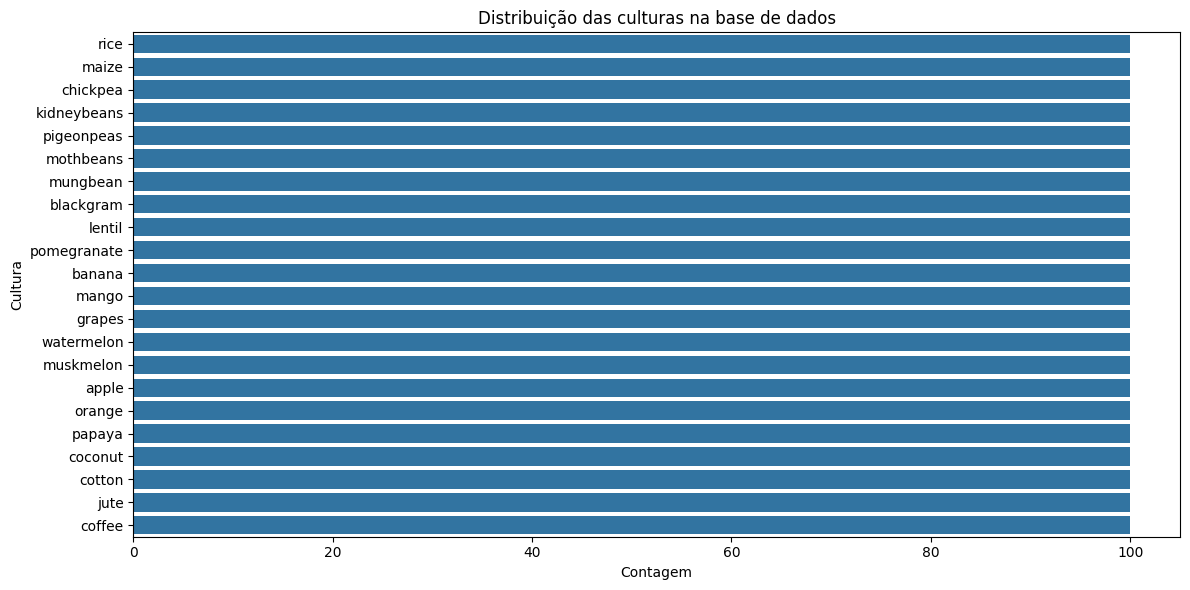

In [4]:
# Plot da distribuição das classes (culturas)
plt.figure(figsize=(12,6))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
plt.title('Distribuição das culturas na base de dados')
plt.xlabel('Contagem')
plt.ylabel('Cultura')
plt.tight_layout()
plt.show()

### Distribuições das Variáveis

Os histogramas abaixo exibem a distribuição de cada variável numérica. Podemos observar a dispersão, simetria e possíveis picos ou caudas longas nas variáveis N, P, K, temperatura, umidade, pH e chuva.

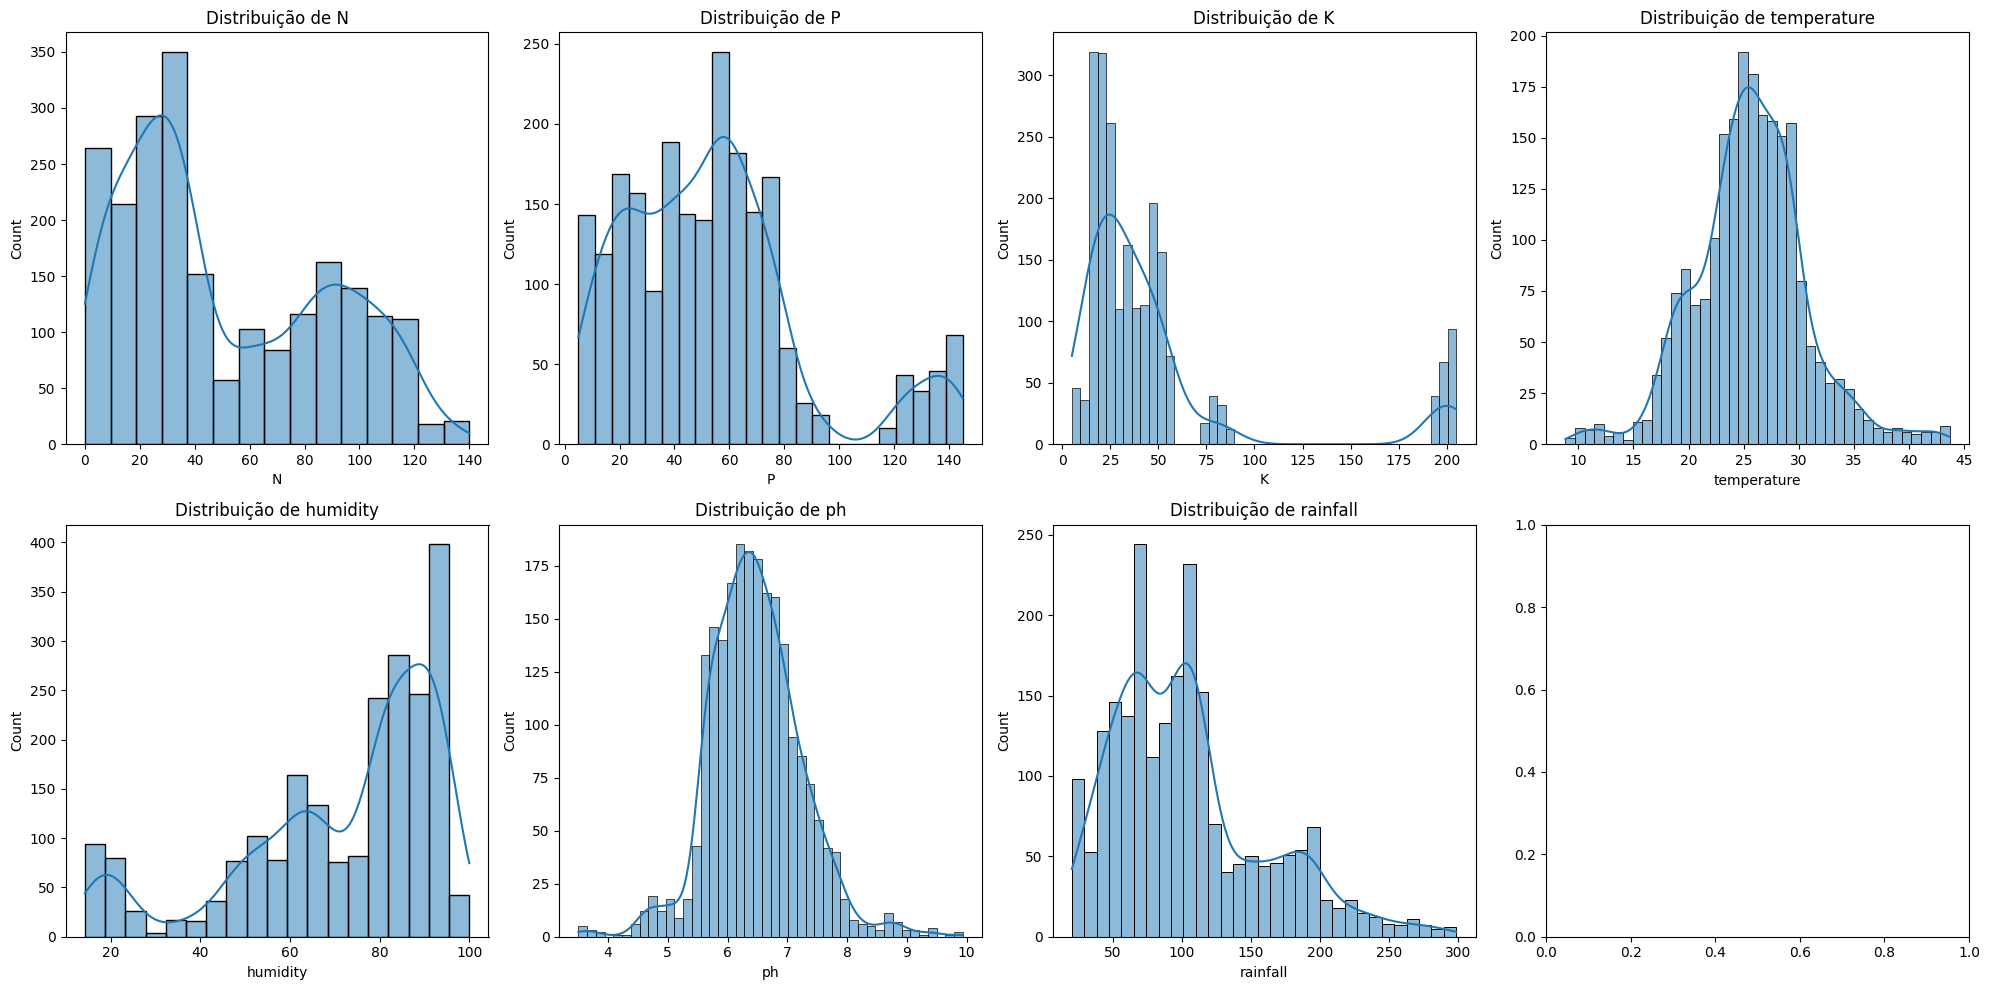

In [5]:
# Histogramas das variáveis contínuas
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for ax, col in zip(axes.flatten(), df.columns[:-1]):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribuição de {col}')
fig.tight_layout()
plt.show()

### Correlações entre Variáveis

O heatmap a seguir ilustra as correlações de Pearson entre as variáveis contínuas. Relações fortes (positivas ou negativas) revelam dependências lineares entre pares de atributos.

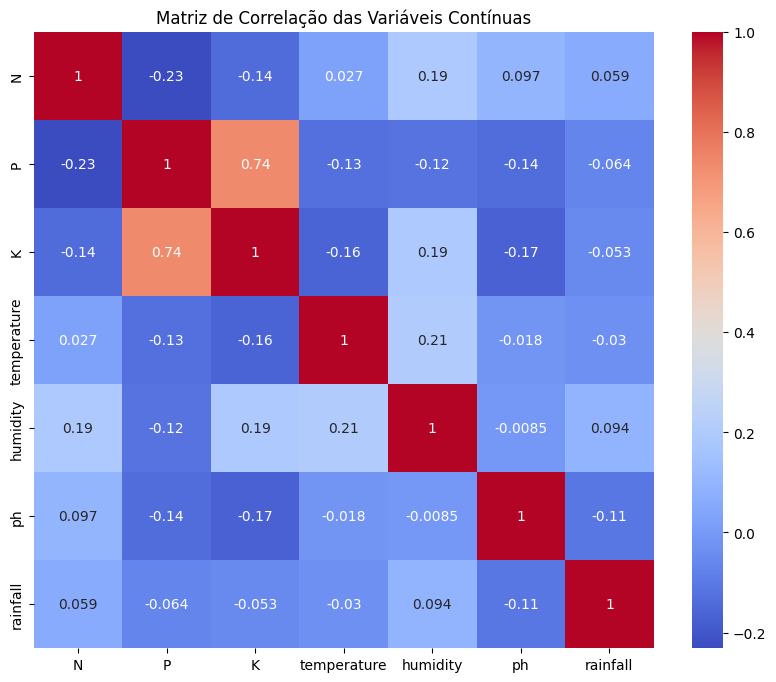

In [6]:
# Mapa de calor de correlação
plt.figure(figsize=(10,8))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis Contínuas')
plt.show()

### Comparação entre Culturas

Os boxplots comparam como cada variável numérica se distribui nas diferentes classes de culturas. Estes visuais permitem avaliar variações e outliers por categoria.

/tmp/ipython-input-2105523271.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-2105523271.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-2105523271.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-2105523271.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-2105523271.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

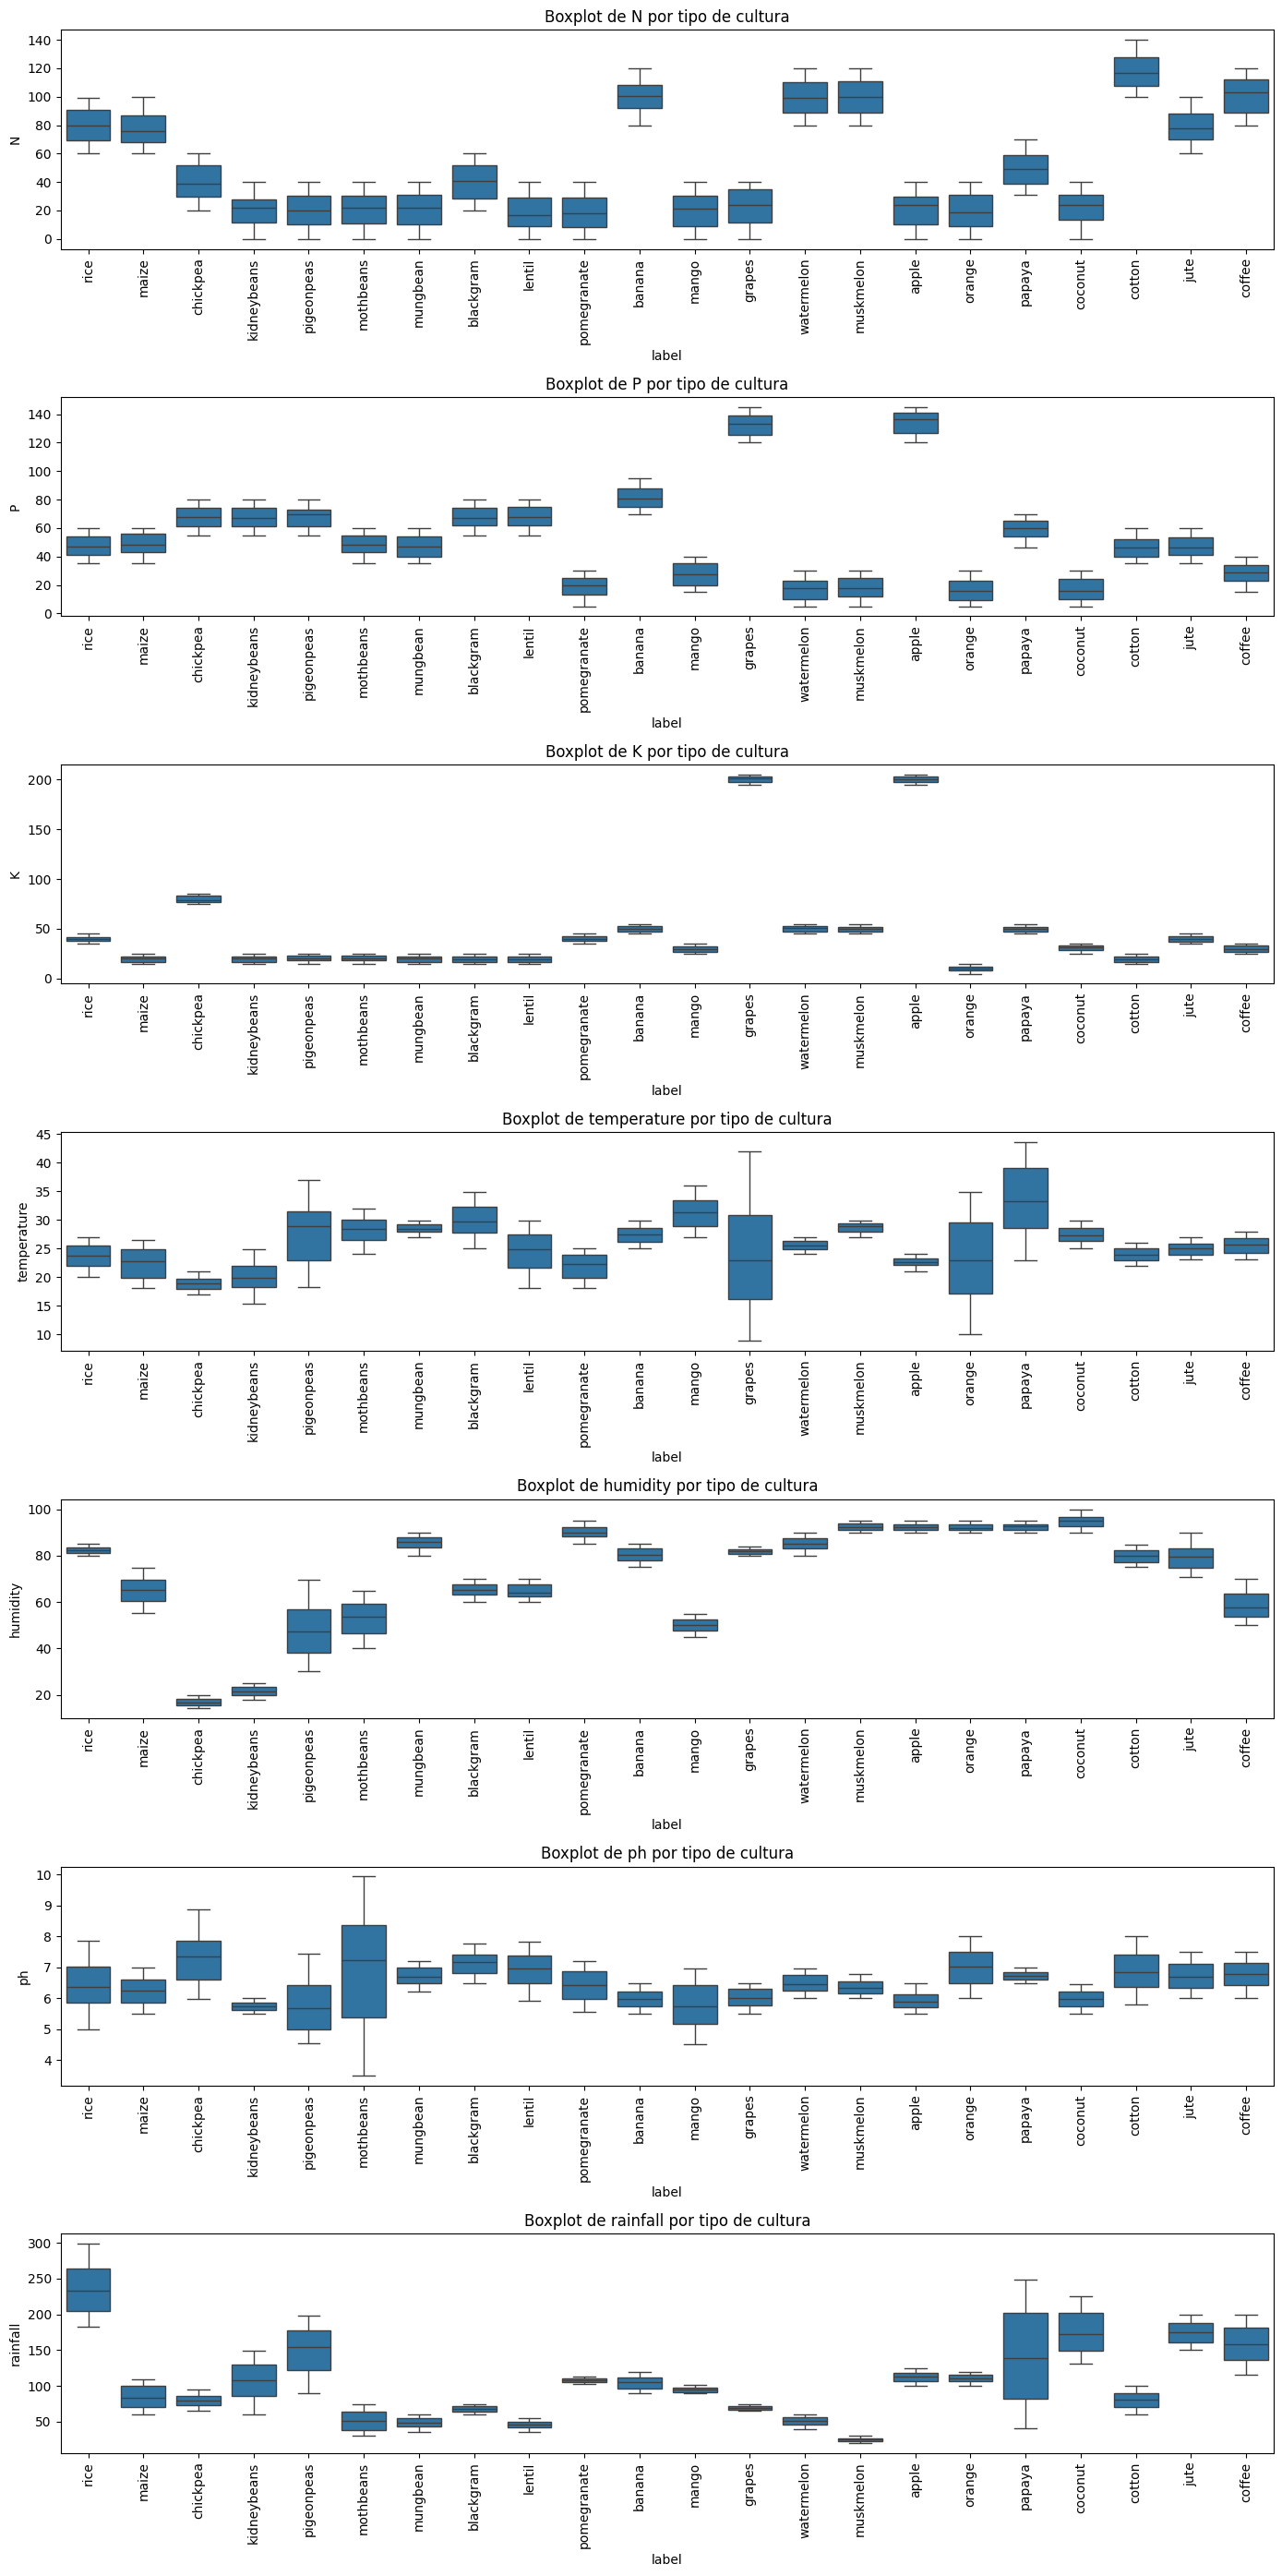

In [7]:
# Boxplots por cultura das variáveis contínuas
selected_vars = ['N','P','K','temperature','humidity','ph','rainfall']
fig, axes = plt.subplots(len(selected_vars), 1, figsize=(14, 4*len(selected_vars)))
for ax, col in zip(axes, selected_vars):
    sns.boxplot(x='label', y=col, data=df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f'Boxplot de {col} por tipo de cultura')
fig.tight_layout()
plt.show()

### Relações Bivariadas

Os scatter plots mostram a relação entre duas variáveis: temperatura vs umidade e chuva vs umidade. Como existem muitas culturas, plotamos apenas uma amostra de 500 pontos para evitar poluição visual. Cada cor corresponde a uma cultura distinta.

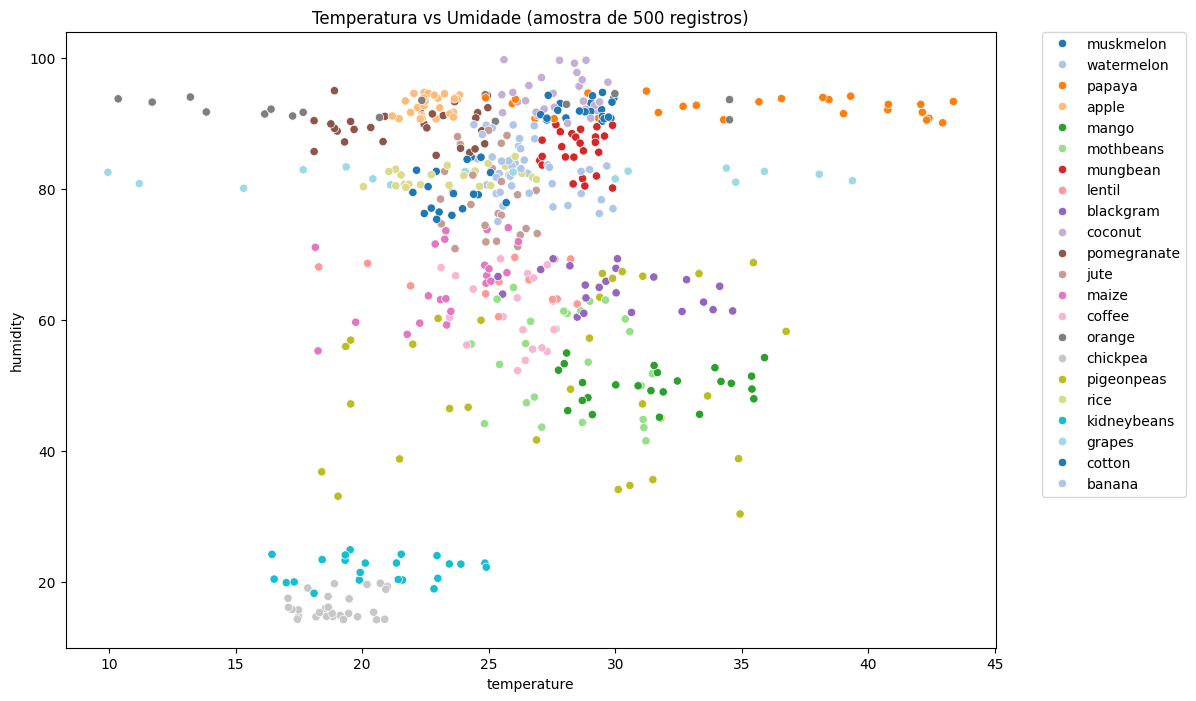

In [8]:
# Scatter plot de temperatura vs umidade (amostra para visualização)
# Para evitar sobreposição excessiva de pontos, plotamos apenas uma amostra de 500 registros
sample_df = df.sample(n=500, random_state=42)
plt.figure(figsize=(12,8))
sns.scatterplot(x='temperature', y='humidity', hue='label', data=sample_df, legend='full', palette='tab20')
plt.title('Temperatura vs Umidade (amostra de 500 registros)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

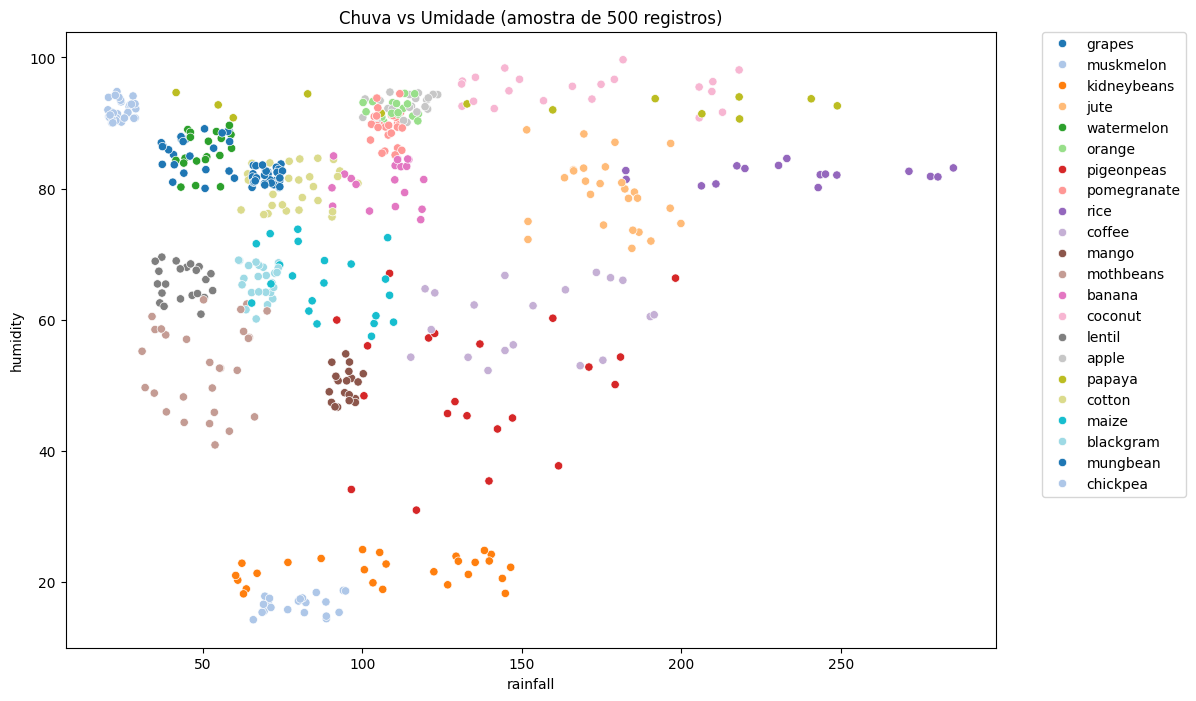

In [9]:
# Scatter plot de chuva vs umidade (amostra para visualização)
sample_df2 = df.sample(n=500, random_state=1)
plt.figure(figsize=(12,8))
sns.scatterplot(x='rainfall', y='humidity', hue='label', data=sample_df2, legend='full', palette='tab20')
plt.title('Chuva vs Umidade (amostra de 500 registros)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [10]:
# Pairplot de algumas variáveis (subamostra para melhor visualização)
# Descomente para executar, sabendo que pode ser demorado caso usemos o dataset completo
# sample_for_pair = df.sample(frac=0.2, random_state=0)
# sns.pairplot(sample_for_pair, hue='label', vars=['N','P','K','rainfall','temperature','humidity'], palette='tab20', height=2.5)
# plt.show()

## Perfil Ideal de Solo e Clima

Criamos um vetor de médias de todos os atributos numéricos com base em todo o conjunto de dados. Esse perfil de referência pode ser comparado aos perfis médios de algumas culturas de interesse, evidenciando preferências particulares de cada cultura em relação aos atributos ambientais e de solo.

In [11]:
# Cálculo do perfil ideal (médias das variáveis)
overall_means = df.drop('label', axis=1).mean()
overall_means

,0
N,50.551818
P,53.362727
K,48.149091
temperature,25.616244
humidity,71.481779
ph,6.469480
rainfall,103.463655


In [12]:
# Comparação de perfis de algumas culturas
# Mude os nomes das culturas conforme necessário
selected_crops = ['rice','maize','chickpea']
crop_means = {p: df[df['label']==p].drop('label', axis=1).mean() for p in selected_crops}
crop_means

{'rice': N               79.890000
 P               47.580000
 K               39.870000
 temperature     23.689332
 humidity        82.272822
 ph               6.425471
 rainfall       236.181114
 dtype: float64,
 'maize': N              77.760000
 P              48.440000
 K              19.790000
 temperature    22.389204
 humidity       65.092249
 ph              6.245190
 rainfall       84.766988
 dtype: float64,
 'chickpea': N              40.090000
 P              67.790000
 K              79.920000
 temperature    18.872847
 humidity       16.860439
 ph              7.336957
 rainfall       80.058977
 dtype: float64}

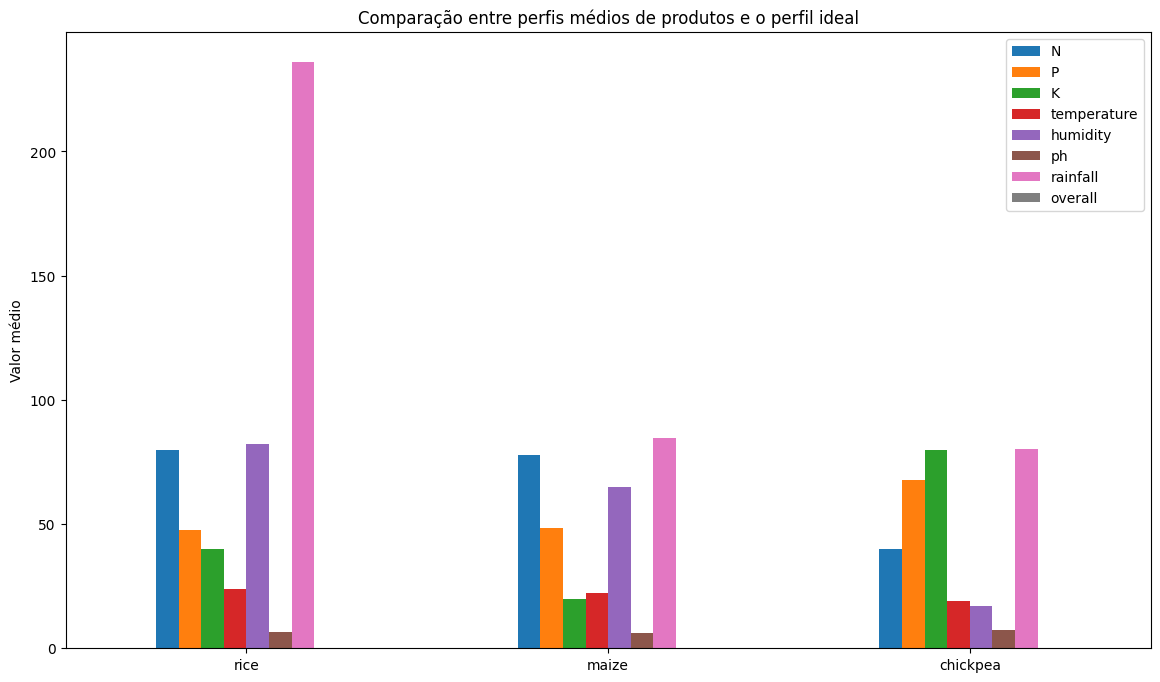

In [13]:
# Gráfico comparativo entre perfis médios e o perfil ideal
prod_means_df = pd.DataFrame(crop_means).T
prod_means_df['overall'] = overall_means
prod_means_df.plot(kind='bar', figsize=(14,8))
plt.title('Comparação entre perfis médios de produtos e o perfil ideal')
plt.ylabel('Valor médio')
plt.xticks(rotation=0)
plt.show()

## Modelos Preditivos

Aqui definimos e treinamos uma série de modelos de classificação para prever o tipo de cultura baseado nas características do solo e do clima. Utilizamos KNN, Regressão Logística, SVM, Árvore de Decisão, Random Forest e Naive Bayes. Os dados são divididos em conjunto de treinamento e teste para avaliar o desempenho dos modelos usando acurácia e relatório de classificação.

In [14]:
# Preparação dos dados para treinamento dos modelos
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definição dos modelos
models = {
    'KNN': Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())]),
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000))]),
    'SVM': Pipeline([('scaler', StandardScaler()), ('clf', SVC())]),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': Pipeline([('scaler', StandardScaler()), ('clf', GaussianNB())])
}
# Treinamento e avaliação dos modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, preds),
        'report': classification_report(y_test, preds, zero_division=0)
    }
results

{'KNN': {'accuracy': 0.9795454545454545,
  'report': '              precision    recall  f1-score   support\n\n       apple       1.00      1.00      1.00        20\n      banana       1.00      1.00      1.00        20\n   blackgram       1.00      1.00      1.00        20\n    chickpea       1.00      1.00      1.00        20\n     coconut       0.95      1.00      0.98        20\n      coffee       1.00      1.00      1.00        20\n      cotton       0.95      1.00      0.98        20\n      grapes       1.00      1.00      1.00        20\n        jute       0.95      1.00      0.98        20\n kidneybeans       0.95      1.00      0.98        20\n      lentil       0.91      1.00      0.95        20\n       maize       1.00      0.95      0.97        20\n       mango       0.95      1.00      0.98        20\n   mothbeans       0.94      0.85      0.89        20\n    mungbean       1.00      1.00      1.00        20\n   muskmelon       1.00      1.00      1.00        20\n      ora

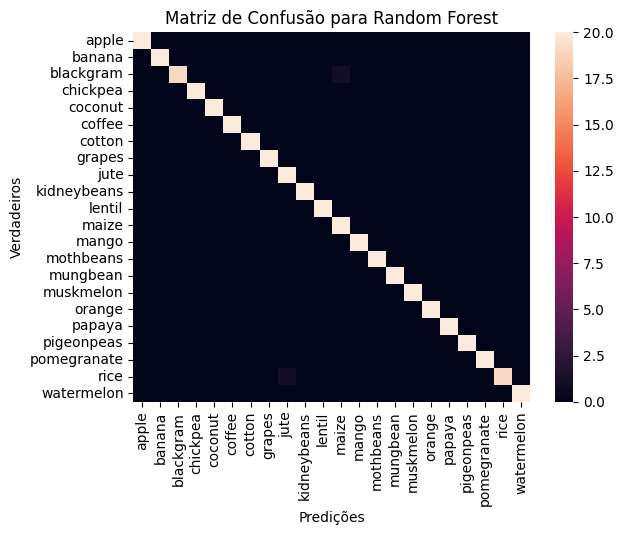

In [15]:
# Matriz de confusão para o modelo Random Forest
best_model = models['Random Forest']
best_preds = best_model.predict(X_test)
cm = confusion_matrix(y_test, best_preds)
sns.heatmap(cm, annot=False, fmt='d', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Matriz de Confusão para Random Forest')
plt.ylabel('Verdadeiros')
plt.xlabel('Predições')
plt.show()

## Conclusão

A análise exploratória permitiu identificar padrões nas variáveis ambientais e na associação destes padrões com diferentes culturas. Os gráficos de histograma mostraram as distribuições das variáveis, o heatmap evidenciou correlações entre variáveis como temperatura e umidade, o boxplot revelou a variabilidade das variáveis por cultura, e os scatter plots ajudaram a explorar relações bidimensionais (como temperatura vs umidade e chuva vs umidade) entre as culturas. A distribuição das classes mostrou que o dataset está balanceado.

No perfil ideal de solo e clima definimos as médias gerais das variáveis e comparamos com os perfis de culturas selecionadas, destacando as preferências de arroz (alta umidade e chuva), milho (elevado nitrogênio) e grão-de-bico (menor umidade e chuva).

Os modelos preditivos testados apresentaram alto desempenho, especialmente Random Forest e Naive Bayes, com acurácia acima de 99%. A matriz de confusão demonstra poucas confusões entre as classes.

**Pontos fortes:** base balanceada, boa separabilidade das classes refletida pelas elevadas acurácias, gráficos informativos.
**Limitações:** ausência de dados de produtividade, definição simplista de perfil ideal (baseada apenas em médias) e potencial sobrecarga visual nos scatter plots/ pairplots ao lidar com todas as 22 culturas. Futuras melhorias incluem tuning de hiperparâmetros, validação cruzada e inclusão de novas variáveis de interesse.